**Préparation des données**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas_datareader.data as web
import datetime

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Import libraries Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

Action Sanofi

In [ ]:
jour_debut = 3
mois_debut = 1
annee_debut = 2017
mois_fin = 1
jour_fin = 29
annee_fin = 2021

In [ ]:
# date de début : année puis mois puis jour
start = datetime.datetime(annee_debut, mois_debut, jour_debut)
# date de fin
end = datetime.datetime(annee_fin, mois_fin, jour_fin)

Sanofi_train = web.DataReader("SAN.PA", 'yahoo', start, end)

In [ ]:
jour_debut = 1
mois_debut = 2
annee_debut = 2021
mois_fin = 2
jour_fin = 26
annee_fin = 2021

In [ ]:
# date de début : année puis mois puis jour
start = datetime.datetime(annee_debut, mois_debut, jour_debut)
# date de fin
end = datetime.datetime(annee_fin, mois_fin, jour_fin)

Sanofi_test = web.DataReader("SAN.PA", 'yahoo', start, end)

In [ ]:
Sanofi_train.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-25,82.139999,80.779999,82.139999,81.500000,1820478.0,78.497124
2021-01-26,81.980003,80.949997,81.080002,81.070000,2053028.0,78.082962
2021-01-27,81.970001,79.070000,81.309998,79.070000,3352652.0,76.156654
2021-01-28,79.180000,78.019997,78.099998,79.089996,2983550.0,76.175911
2021-01-29,78.830002,77.150002,78.000000,77.150002,3486740.0,74.307396


In [ ]:
Sanofi_test.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-01,78.830002,77.500000,77.879997,78.209999,1948193,75.328339
2021-02-02,79.430000,78.110001,78.269997,78.599998,2417655,75.703972
2021-02-03,79.510002,77.540001,78.779999,77.730003,2096196,74.866028
2021-02-04,79.190002,77.190002,77.199997,78.830002,2182240,75.925499
2021-02-05,81.370003,79.980003,81.180000,80.010002,3028985,77.062019
2021-02-08,81.650002,80.300003,80.550003,80.769997,2211880,77.794014
2021-02-09,80.769997,79.639999,80.550003,80.580002,1912708,77.611023
2021-02-10,81.089996,79.110001,81.000000,79.459999,2215841,76.532280
2021-02-11,79.720001,77.639999,79.110001,77.809998,3274514,74.943077


In [ ]:
# On remplace les dates par des indices
Sanofi_train  = Sanofi_train.rename_axis('Date').reset_index()

In [ ]:
Sanofi_train.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,78.919998,77.900002,78.250000,78.300003,2325991.0,64.504875
1,2017-01-04,78.599998,77.930000,78.290001,78.300003,2371916.0,64.504875
2,2017-01-05,78.660004,77.370003,77.540001,78.269997,2402135.0,64.480156
3,2017-01-06,77.110001,75.529999,77.000000,76.690002,3922003.0,63.178539
4,2017-01-09,77.839996,76.669998,77.010002,77.519997,2248859.0,63.862297


In [ ]:
Sanofi_test  = Sanofi_test.rename_axis('Date').reset_index()

In [ ]:
Sanofi_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-02-01,78.830002,77.500000,77.879997,78.209999,1948193,75.328339
1,2021-02-02,79.430000,78.110001,78.269997,78.599998,2417655,75.703972
2,2021-02-03,79.510002,77.540001,78.779999,77.730003,2096196,74.866028
3,2021-02-04,79.190002,77.190002,77.199997,78.830002,2182240,75.925499
4,2021-02-05,81.370003,79.980003,81.180000,80.010002,3028985,77.062019


In [ ]:
dataset_train = Sanofi_train
dataset_test = Sanofi_test

In [ ]:
# conversion de la feature Close en values pour keras 
train = dataset_train.iloc[:, 4:5]
training_set = dataset_train.iloc[:, 4:5].values

In [ ]:
train.head()

,Close
0,78.300003
1,78.300003
2,78.269997
3,76.690002
4,77.519997


In [ ]:
# conversion de la feature Close en values pour keras 
test = dataset_test.iloc[:, 4:5]
testing_set = dataset_test.iloc[:, 4:5].values

In [ ]:
training_set.shape

(1042, 1)

In [ ]:
len(training_set)

1042

In [ ]:
training_set

array([[78.30000305],
       [78.30000305],
       [78.26999664],
       ...,
       [79.06999969],
       [79.08999634],
       [77.15000153]])

In [ ]:
len(testing_set)

20

In [ ]:
# Mise à l'échelle des data dans l'interval 0,1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
type(training_set_scaled)

numpy.ndarray

In [ ]:
# Creation du train set pour une prévision de la valeur de l'action au jour j 
# basée sur les 60 jours précédents (3 mois) 
X_train = []
y_train = []
# Dans X_train, les 60 jours précédents le jour i
# Dans y_train, le jour i
# training_set_scaled étant une array, il faut ajouter le numéro de colonne, soit 0 
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
# transformation des listes X_train et y_train en array avec numpy    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Redimensionnement en 3 dimensions nécessaire pour la modèlisation
# cf doc Keras dans RNN et output shape
# batchsize : nbre de lignes du dataset soit X_train.shape[0)
# timestep : nbre de colonnes du dataset, soit X_train.shape[1], ici = 60 
# input_dim = nbre de variables explicatives, ici 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **Pour la dernière partie data set avec la variable Volume**

In [ ]:
# conversion de la feature Close en values pour keras 
train2 = dataset_train.iloc[:, 4:6]
training_set2 = dataset_train.iloc[:, 4:6].values
# conversion de la feature Close en values pour keras 
test2 = dataset_test.iloc[:, 4:6]
testing_set2 = dataset_test.iloc[:, 4:6].values

In [ ]:
train2.head()

,Close,Volume
0,78.300003,2325991.0
1,78.300003,2371916.0
2,78.269997,2402135.0
3,76.690002,3922003.0
4,77.519997,2248859.0


In [ ]:
np.shape(training_set_scaled2)

(1042, 2)

In [ ]:
# Mise à l'échelle des data dans l'interval 0,1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc.fit_transform(training_set2)

In [ ]:
training_set_scaled2

array([[0.48552133, 0.25785691],
       [0.48552133, 0.2629481 ],
       [0.48455588, 0.26629815],
       ...,
       [0.510296  , 0.37167146],
       [0.51093939, 0.3307532 ],
       [0.44852   , 0.38653631]])

In [ ]:
# Creation du train set pour une prévision de la valeur de l'action au jour j 
# basée sur les 60 jours précédents (3 mois) 
X_train2 = []
y_train2 = []
# Dans X_train, les 60 jours précédents le jour i
# Dans y_train, le jour i
# training_set_scaled étant une array, il faut ajouter le numéro de colonne, soit 0 
for i in range(60, len(training_set2)):
    X_train2.append(training_set_scaled2[i-60:i, 0:2])
    y_train2.append(training_set_scaled2[i, 0])
# transformation des listes X_train et y_train en array avec numpy    
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

In [ ]:
# Redimensionnement en 3 dimensions nécessaire pour la modèlisation
# cf doc Keras dans RNN et output shape
# batchsize : nbre de lignes du dataset soit X_train.shape[0)
# timestep : nbre de colonnes du dataset, soit X_train.shape[1], ici = 60 
# input_dim = nbre de variables explicatives, ici 1
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 2))

#**Partie 1: Modélisation RNN initiale**

**Modèle de régression RNN basé sur un réseau de neurones RNN LSTM avec keras :**

Couche d’entrée : 50 neurones, 
avec 20 % taux d’extinction des neurones

Puis 3 couches cachées, chacune ayant 50 neurones avec 20 % taux d’extinction des neurones

1 couche de sortie avec 1 seul neurone

Choisir les valeurs des hyperparamètres suivantes :

Optimizer : Adam

Loss : mean_squared_error'

Nombre d’époques : 50

Batch_size : 32 


In [ ]:
# Initialisation RNN avec Sequential()
regressor = Sequential()

In [ ]:
# première couche LSTM et régularisation Dropout
# units = nbre de neurones de la couche
# return_sequences=True car dans le réseau on empile plusieurs couches LSTM
# dans input_shape, indication du train set avec le nbre de time steps (60) et le nbre de feature, ici 1 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# deuxième couche LSTM layer et régularisation Dropout identique couche précédente
# entrées de cette couche = sortie de la couche précédente : input_shape inutile 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# troisième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# quatrième couche LSTM layer et régularisation Dropout 
# dernière couche LSTM : return_sequence = False (valeur par défaut)
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# couche de sortie 1 seul neurone
regressor.add(Dense(units = 1))

In [ ]:
# Compilation RNN
# optimizer : cf doc Keras adam (ou RMSprop recommandé pour les RNN)
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

In [ ]:
# Fit le RNN sur train set
# choisir les valeurs des hyperparamètres
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
31/31 [==============================] - 10s 111ms/step - loss: 0.1299
Epoch 2/50
31/31 [==============================] - 4s 114ms/step - loss: 0.0170
Epoch 3/50
31/31 [==============================] - 4s 114ms/step - loss: 0.0142
Epoch 4/50
31/31 [==============================] - 4s 114ms/step - loss: 0.0120
Epoch 5/50
31/31 [==============================] - 4s 113ms/step - loss: 0.0114
Epoch 6/50
31/31 [==============================] - 3s 113ms/step - loss: 0.0103
Epoch 7/50
31/31 [==============================] - 3s 113ms/step - loss: 0.0105
Epoch 8/50
31/31 [==============================] - 4s 113ms/step - loss: 0.0112
Epoch 9/50
31/31 [==============================] - 4s 114ms/step - loss: 0.0096
Epoch 10/50
31/31 [==============================] - 4s 113ms/step - loss: 0.0091
Epoch 11/50
31/31 [==============================] - 4s 114ms/step - loss: 0.0075
Epoch 12/50
31/31 [==============================] - 4s 116ms/step - loss: 0.0103
Epoch 13/50
31/31 [=====

**Prédictions**

In [ ]:
# récupération des valeurs réelles (valeur de cloture) des actions dans le test set (20 valeurs de février)
real_stock_price = testing_set

In [ ]:
# prédictions du feature Close 
# concaténation des datasets train et test d'origine, au niveau des lignes avec axis = 0 (l'un au dessus de l'autre)
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
# dans inputs on met les 60 jours précédents le jour à prédire et ceci pour tous les jours du mois à prédire :
# transformation en array pour keras
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# redimensionnement nécessaire du dataset 
inputs = inputs.reshape(-1,1)
# utilisation du meme objet sc utilisée pour l'entrainement
inputs = sc.transform(inputs)

# alimentation du X_test avec les valeurs inputs correspondantes 
X_test = []
# range de 60 à 80 puisque test set de 20 lignes
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
# transformation en array    
X_test = np.array(X_test)
# redimensionnement en 3 dimensions avec reshape pour obtenir un X_test avec 20 lignes, 60 colonnes et 1 en troisième dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# prévisions avec fonction predict sur le modèle regressor 
predicted_stock_price = regressor.predict(X_test)
# prévisions sur l'échelle d'orignie avec transformation inverse
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
r2_score(real_stock_price, predicted_stock_price)

0.18357538800637374

In [ ]:
mean_squared_error(real_stock_price, predicted_stock_price)

1.6550973515375518

In [ ]:
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

In [ ]:
# moyenne valeur action sur test set pour comparaison avec rmse
dataset_test['Close'].mean()

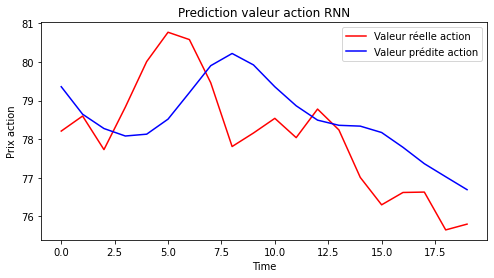

In [ ]:
# Visu résultats vraies valeurs versus prévisions avec 50 époques
plt.figure(figsize=(8,4))
plt.plot(real_stock_price, color = 'red', label = 'Valeur réelle action')
plt.plot(predicted_stock_price, color = 'blue', label = 'Valeur prédite action')
plt.title('Prediction valeur action RNN')
plt.xlabel('Time')
plt.ylabel('Prix action')
plt.legend()
plt.show()

# **En ajoutant la variable Volume**

In [ ]:
# Initialisation RNN avec Sequential()
regressor2 = Sequential()
# première couche LSTM et régularisation Dropout
# units = nbre de neurones de la couche
# return_sequences=True car dans le réseau on empile plusieurs couches LSTM
# dans input_shape, indication du train set avec le nbre de time steps (60) et le nbre de feature, ici 1 
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 2)))
regressor2.add(Dropout(0.2))
# deuxième couche LSTM layer et régularisation Dropout identique couche précédente
# entrées de cette couche = sortie de la couche précédente : input_shape inutile 
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))
# troisième couche LSTM layer et régularisation Dropout 
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))
# quatrième couche LSTM layer et régularisation Dropout 
# dernière couche LSTM : return_sequence = False (valeur par défaut)
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))
# couche de sortie 1 seul neurone
regressor2.add(Dense(units = 1))

In [ ]:
# Compilation RNN
# optimizer : cf doc Keras adam (ou RMSprop recommandé pour les RNN)
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 60, 50)            10600     
_________________________________________________________________
dropout_45 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_46 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_47 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 50)              

In [ ]:
#Fit le RNN sur train set
# choisir les valeurs des hyperparamètres
regressor2.fit(X_train2, y_train2, epochs = 50, batch_size = 32)

Epoch 1/50
31/31 [==============================] - 9s 107ms/step - loss: 0.0993
Epoch 2/50
31/31 [==============================] - 3s 110ms/step - loss: 0.0152
Epoch 3/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0158
Epoch 4/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0132
Epoch 5/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0129
Epoch 6/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0114
Epoch 7/50
31/31 [==============================] - 3s 107ms/step - loss: 0.0102
Epoch 8/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0113
Epoch 9/50
31/31 [==============================] - 3s 109ms/step - loss: 0.0102
Epoch 10/50
31/31 [==============================] - 3s 110ms/step - loss: 0.0085
Epoch 11/50
31/31 [==============================] - 3s 108ms/step - loss: 0.0092
Epoch 12/50
31/31 [==============================] - 3s 108ms/step - loss: 0.0081
Epoch 13/50
31/31 [======

In [ ]:
# récupération des valeurs réelles (valeur de cloture) des actions dans le test set (20 valeurs de février)
real_stock_price2 = sc.transform(testing_set2)
real_stock_price2=real_stock_price2[:,0]
real_stock_price2

array([0.48262545, 0.4951737 , 0.46718158, 0.50257406, 0.54054061,
       0.56499345, 0.55888036, 0.52284424, 0.46975539, 0.48101685,
       0.49324327, 0.47715576, 0.50096521, 0.48359067, 0.44401552,
       0.42117127, 0.43146727, 0.43178885, 0.40025746, 0.40508376])

In [ ]:
# prédictions du feature Close 
# concaténation des datasets train et test d'origine, au niveau des lignes avec axis = 0 (l'un au dessus de l'autre)
dataset_total2 = pd.concat((dataset_train[['Close','Volume']], dataset_test[['Close','Volume']]), axis = 0)
dataset_total2

,Close,Volume
0,78.300003,2325991.0
1,78.300003,2371916.0
2,78.269997,2402135.0
3,76.690002,3922003.0
4,77.519997,2248859.0
...,...,...
15,76.300003,1521805.0
16,76.620003,2023883.0
17,76.629997,2030968.0
18,75.650002,2373849.0


In [ ]:
inputs = dataset_total2[len(dataset_total2) - len(dataset_test) - 60:].values
# redimensionnement nécessaire du dataset 
inputs = inputs.reshape(-1,2)
# utilisation du meme objet sc utilisée pour l'entrainement
inputs = sc.transform(inputs)

# alimentation du X_test avec les valeurs inputs correspondantes 
X_test2 = []
# range de 60 à 80 puisque test set de 20 lignes
for i in range(60, 80):
    X_test2.append(inputs[i-60:i, 0:2])
# transformation en array    
X_test2 = np.array(X_test2)
# redimensionnement en 3 dimensions avec reshape pour obtenir un X_test avec 20 lignes, 60 colonnes et 1 en troisième dimension
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 2))
X_test2

array([[[0.72265115, 0.2870995 ],
        [0.64703988, 0.30570108],
        [0.6988417 , 0.47070342],
        ...,
        [0.510296  , 0.37167146],
        [0.51093939, 0.3307532 ],
        [0.44852   , 0.38653631]],

       [[0.64703988, 0.30570108],
        [0.6988417 , 0.47070342],
        [0.69111976, 0.41732273],
        ...,
        [0.51093939, 0.3307532 ],
        [0.44852   , 0.38653631],
        [0.48262545, 0.21597462]],

       [[0.6988417 , 0.47070342],
        [0.69111976, 0.41732273],
        [0.77413115, 0.24237412],
        ...,
        [0.44852   , 0.38653631],
        [0.48262545, 0.21597462],
        [0.4951737 , 0.26801868]],

       ...,

       [[0.69176315, 0.5100916 ],
        [0.67213636, 0.23275689],
        [0.67020594, 0.20807315],
        ...,
        [0.44401552, 0.2909779 ],
        [0.42117127, 0.1687057 ],
        [0.43146727, 0.22436553]],

       [[0.67213636, 0.23275689],
        [0.67020594, 0.20807315],
        [0.63770909, 0.21568073],
        .

In [ ]:
# prévisions avec fonction predict sur le modèle regressor 
predicted_stock_price2 = regressor2.predict(X_test2)
predicted_stock_price2

array([[0.5233546 ],
       [0.50561357],
       [0.49666464],
       [0.49098957],
       [0.4903384 ],
       [0.49741665],
       [0.5140514 ],
       [0.533039  ],
       [0.542552  ],
       [0.53474224],
       [0.5212337 ],
       [0.5102198 ],
       [0.5010671 ],
       [0.4960304 ],
       [0.494125  ],
       [0.4882965 ],
       [0.4782832 ],
       [0.46712074],
       [0.45755947],
       [0.44718426]], dtype=float32)

In [ ]:
real_stock_price2

array([0.48262545, 0.4951737 , 0.46718158, 0.50257406, 0.54054061,
       0.56499345, 0.55888036, 0.52284424, 0.46975539, 0.48101685,
       0.49324327, 0.47715576, 0.50096521, 0.48359067, 0.44401552,
       0.42117127, 0.43146727, 0.43178885, 0.40025746, 0.40508376])

In [ ]:
np.shape(predicted_stock_price2)

(20, 1)

In [ ]:
r2_score(real_stock_price2, predicted_stock_price2)

0.10177218543697353

# **Partie 2: Modelisation RNN optimisée**

In [ ]:
def build_regressor(optimizer='adam'):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(LSTM(units = 50))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mse'])
    return regressor

In [ ]:
# choix des hyperparamètres optimaux avec grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
regress = KerasRegressor(build_fn = build_regressor)

# hyperparametres à mettre dans un dictionnaire
parameters = {'batch_size': [16, 32, 64],
              'epochs': [10, 50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = regress,
                           param_grid = parameters,
                           scoring ='neg_mean_squared_error',
                           cv = 5)
# entrainement 
grid_search = grid_search.fit(X_train, y_train)
# meilleurs résultats 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

# **Notre modèle**

In [ ]:
regressor = Sequential()
#modèle
# première couche LSTM et régularisation Dropout
# units = nbre de neurones de la couche
# return_sequences=True car dans le réseau on empile plusieurs couches LSTM
# dans input_shape, indication du train set avec le nbre de time steps (60) et le nbre de feature, ici 1 
regressor.add(LSTM(units = (100), return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))
# deuxième couche LSTM layer et régularisation Dropout identique couche précédente
# entrées de cette couche = sortie de la couche précédente : input_shape inutile 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# troisième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# quatrième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# 5ième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.1))

# dernière couche LSTM : return_sequence = False (valeur par défaut)
#regressor.add(LSTM(units = 100))
#regressor.add(Dropout(0.1))
# couche de sortie 1 seul neurone
regressor.add(Dense(units = 1))

In [ ]:
#on met les paramètres optimaux
btch_size = 50
epoc = 100
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = epoc, batch_size = btch_size)
predicted_stock_price2 = regressor.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

Epoch 1/100
20/20 [==============================] - 13s 264ms/step - loss: 0.1434
Epoch 2/100
20/20 [==============================] - 5s 264ms/step - loss: 0.0265
Epoch 3/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0164
Epoch 4/100
20/20 [==============================] - 5s 263ms/step - loss: 0.0128
Epoch 5/100
20/20 [==============================] - 5s 263ms/step - loss: 0.0119
Epoch 6/100
20/20 [==============================] - 5s 264ms/step - loss: 0.0124
Epoch 7/100
20/20 [==============================] - 5s 269ms/step - loss: 0.0112
Epoch 8/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0101
Epoch 9/100
20/20 [==============================] - 5s 265ms/step - loss: 0.0096
Epoch 10/100
20/20 [==============================] - 5s 262ms/step - loss: 0.0096
Epoch 11/100
20/20 [==============================] - 5s 264ms/step - loss: 0.0093
Epoch 12/100
20/20 [==============================] - 5s 265ms/step - loss: 0.0071
Epoch 13/100

In [ ]:
r2_score(real_stock_price, predicted_stock_price2)

0.5454130999035285

In [ ]:
mean_squared_error(real_stock_price, predicted_stock_price2)

0.9215616032888647

In [ ]:
rmse2 = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price2))
rmse2 #pour comparaison la valeur moyenne action est de 78

0.9599800015046484

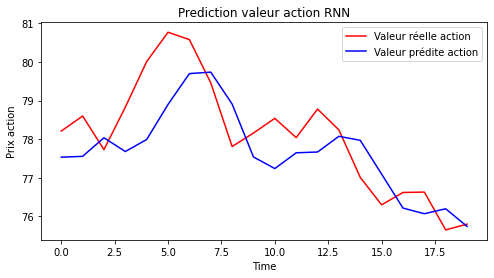

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(real_stock_price, color = 'red', label = 'Valeur réelle action')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Valeur prédite action')
plt.title('Prediction valeur action RNN')
plt.xlabel('Time')
plt.ylabel('Prix action')
plt.legend()
plt.show()

# **Nouveau modèle**

In [ ]:
regressor = Sequential()
#modèle
# première couche LSTM et régularisation Dropout
# units = nbre de neurones de la couche
# return_sequences=True car dans le réseau on empile plusieurs couches LSTM
# dans input_shape, indication du train set avec le nbre de time steps (60) et le nbre de feature, ici 1 

regressor.add(LSTM(units = (100), return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))
# deuxième couche LSTM layer et régularisation Dropout identique couche précédente
# entrées de cette couche = sortie de la couche précédente : input_shape inutile 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# troisième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# quatrième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))
# 5ième couche LSTM layer et régularisation Dropout 
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.1))

# dernière couche LSTM : return_sequence = False (valeur par défaut)
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.1))
# couche de sortie 1 seul neurone
regressor.add(Dense(units = 1))

In [ ]:
#on met les paramètres optimaux
btch_size = 60
epoc = 100
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = epoc, batch_size = btch_size)

Epoch 1/100
17/17 [==============================] - 17s 428ms/step - loss: 0.1719
Epoch 2/100
17/17 [==============================] - 7s 428ms/step - loss: 0.0316
Epoch 3/100
17/17 [==============================] - 8s 442ms/step - loss: 0.0214
Epoch 4/100
17/17 [==============================] - 7s 434ms/step - loss: 0.0175
Epoch 5/100
17/17 [==============================] - 7s 428ms/step - loss: 0.0145
Epoch 6/100
17/17 [==============================] - 7s 429ms/step - loss: 0.0148
Epoch 7/100
17/17 [==============================] - 7s 429ms/step - loss: 0.0161
Epoch 8/100
17/17 [==============================] - 7s 430ms/step - loss: 0.0133
Epoch 9/100
17/17 [==============================] - 7s 433ms/step - loss: 0.0132
Epoch 10/100
17/17 [==============================] - 7s 430ms/step - loss: 0.0110
Epoch 11/100
17/17 [==============================] - 7s 432ms/step - loss: 0.0118
Epoch 12/100
17/17 [==============================] - 7s 431ms/step - loss: 0.0101
Epoch 13/100

In [ ]:
predicted_stock_price3 = regressor.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

In [ ]:
r2_score(real_stock_price, predicted_stock_price3)

0.5764106094573321

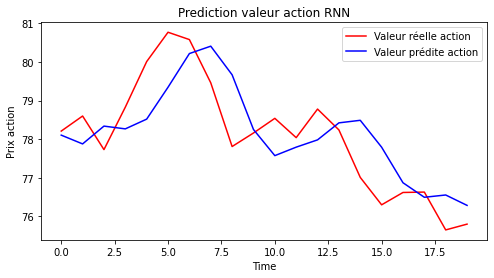

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(real_stock_price, color = 'red', label = 'Valeur réelle action')
plt.plot(predicted_stock_price3, color = 'blue', label = 'Valeur prédite action')
plt.title('Prediction valeur action RNN')
plt.xlabel('Time')
plt.ylabel('Prix action')
plt.legend()
plt.show()

# **Partie 3: Amélioration du modèle**

Ajoutons la variable Volume à notre dataset d'étude.